# Lab 7 and 8

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import numpy.random as rnd
import pandas as pd
import pickle
import h5py

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['agg.path.chunksize'] = 10000

# Lab 7 
Event selection optimization:

You and your lab partner should pick different pT (transverse momentum) samples for this lab. In each pT sample, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to give expected yields accordingly (See Dataset descriptions).

For this lab, I will examine the high pT sample.

In [2]:
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
dict_higgs_hi = pickle.load(infile)
dict_higgs_hi.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [3]:
infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
dict_qcd_hi = pickle.load(infile2)
dict_qcd_hi.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [4]:
hhdf = pd.DataFrame(dict_higgs_hi)
hhdf #signal, high higgs dataframe

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [5]:
hqdf = pd.DataFrame(dict_qcd_hi)
hqdf #background, high qcd dataframe

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


In [6]:
hf_hl = h5py.File('data_highLumi_pt_1000_1200.h5', 'r')
data_hl = np.array(hf_hl.get('data'))
data_hl = np.transpose(data_hl)
hf_hl.close()

In [7]:
hf_ll = h5py.File('data_lowLumi_pt_1000_1200.h5', 'r')
data_ll = np.array(hf_ll.get('data'))
data_ll = np.transpose(data_ll)
hf_ll.close()

1.) Make a stacked histogram plot for the feature variable: mass 

Evaluate expected significance (5sigma) without any event selection.

Use Poisson statistics for significance calculation

Compare the exact significance to the approximation  NHiggs/(√NQCD) . If they are equivalent, explain your findings.

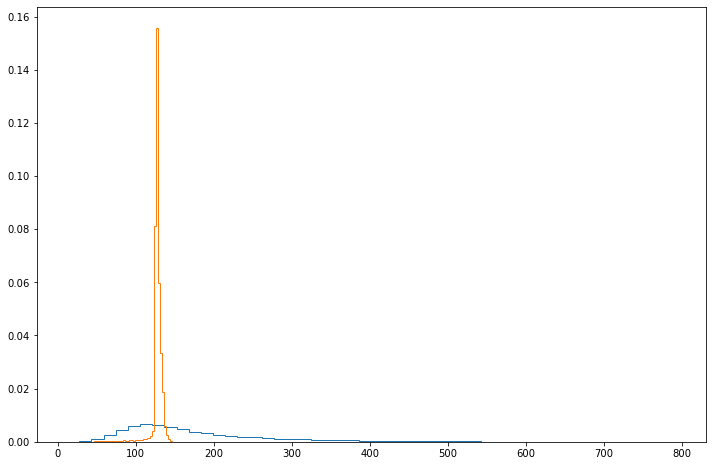

In [8]:
bkgd_hist_bin_val, xedges_bkgd, patches_b = plt.hist(hqdf['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
higgs_hist_bin_val, xedges_higgs, patches_h = plt.hist(hhdf['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
plt.show()

In [9]:
len(bkgd_hist_bin_val)

50

In [10]:
x_centers_bkgd = (xedges_bkgd[:-1] + xedges_bkgd[1:]) / 2
len(x_centers_bkgd)

50

In [11]:
mu_bkgd = x_centers_bkgd[bkgd_hist_bin_val.argmax()]
mu_bkgd

113.3806516566886

In [12]:
len(higgs_hist_bin_val)

50

In [13]:
x_centers_higgs = (xedges_higgs[:-1] + xedges_higgs[1:]) / 2
len(x_centers_higgs)

50

In [14]:
mu_higgs = x_centers_higgs[higgs_hist_bin_val.argmax()]
mu_higgs

126.92753020797062

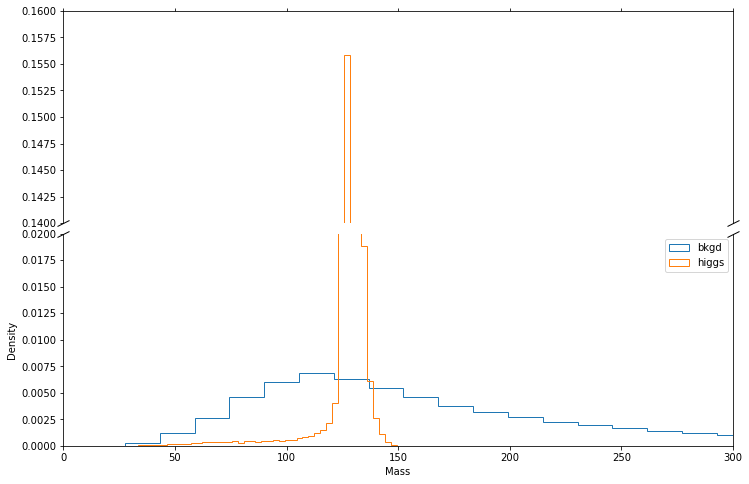

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

ax1.hist(hqdf['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax1.hist(hhdf['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
ax2.hist(hqdf['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax2.hist(hhdf['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')

ax1.set_xlim(0,300)
ax1.set_ylim(0.14, .16)
ax2.set_ylim(0, 0.02)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_ylabel('Density')
ax2.set_xlabel('Mass')

plt.legend()
plt.show()

In [16]:
cdf = stats.poisson(mu_bkgd).cdf(mu_higgs)
significance = 1-cdf
significance_sigma = stats.poisson.isf(1-cdf, mu_bkgd)
print(significance, significance_sigma)

0.11032786607244838 126.0


The significance of the signal without event selection is around 11%, with the border at a mass of 126 units.

In [17]:
1-cdf

0.11032786607244838

In [18]:
estimate = 50/np.sqrt(2000)
estimate-1

0.1180339887498949

Our estimate is similar to the event selection, as when subtracted by 1, they both land at around 11 percent. This would mean that our significance is close to our estimate.

2.) Identify mass cuts to optimize the expected significance.

Try different mass cuts systematically

Evaluate expected significance for each set of mass cuts

Identify the set of mass cuts which give you the highest significance.

In [19]:
#mass cut 1 - 100 to 140
higgs_cut1 = hhdf.query('mass > 100 & mass < 140')
bkgd_cut1 = hqdf.query('mass > 100 & mass < 140')

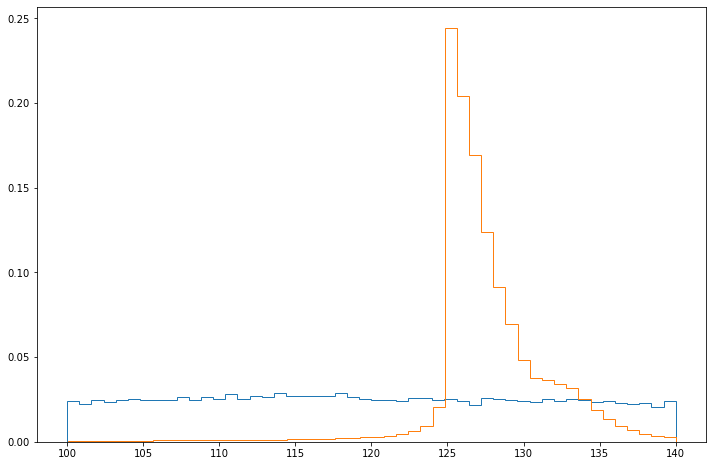

In [20]:
bhbv_cut1, xedges_bcut1, patches_bc1 = plt.hist(bkgd_cut1['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
hhbv_cut1, xedges_hcut1, patches_hc1 = plt.hist(higgs_cut1['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
plt.show()

In [21]:
xch_cut1 = (xedges_hcut1[:-1] + xedges_hcut1[1:]) / 2
mu_hc1 = xch_cut1[hhbv_cut1.argmax()]
mu_hc1 #cut 1 mu_higgs

125.21760071169254

In [22]:
xcb_cut1 = (xedges_bcut1[:-1] + xedges_bcut1[1:]) / 2
mu_bc1 = xcb_cut1[bhbv_cut1.argmax()]
mu_bc1 #cut 1 mu_bkgd

114.00020360097187

In [23]:
cdf_cut1 = stats.poisson(mu_bc1).cdf(mu_hc1)
sign_cut1 = 1-cdf_cut1
significance_sigma_cut1 = stats.poisson.isf(1-cdf_cut1, mu_bc1)
print(sign_cut1*100, significance_sigma_cut1)

14.117852793190277 125.0


Cut 1 yields a higher significance at around 14 percent, but there is possibly potential for it to grow further if the mass is further cut such that the peak is skewed more towards the left side of the graph.

In [24]:
#mass cut 2 - mass > 120
higgs_cut2 = hhdf.query('mass > 120')
bkgd_cut2 = hqdf.query('mass > 120')

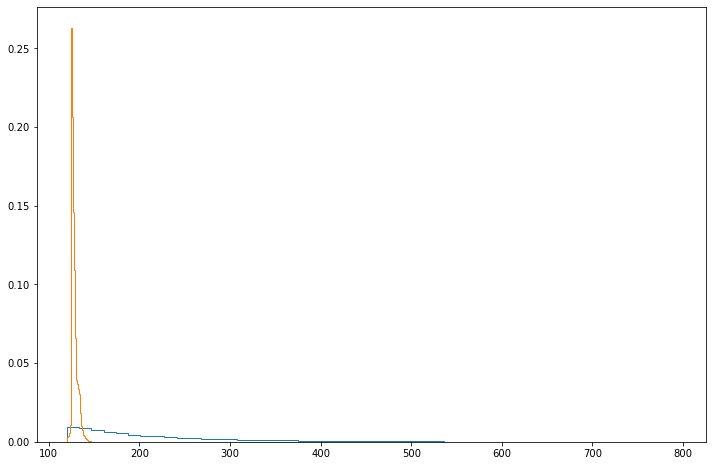

In [25]:
bhbv_cut2, xedges_bcut2, patches_bc2 = plt.hist(bkgd_cut2['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
hhbv_cut2, xedges_hcut2, patches_hc2 = plt.hist(higgs_cut2['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
plt.show()

In [26]:
xch_cut2 = (xedges_hcut2[:-1] + xedges_hcut2[1:]) / 2
mu_hc2 = xch_cut2[hhbv_cut2.argmax()]
mu_hc2 #cut 2 mu_higgs

125.19272318824079

In [27]:
xcb_cut2 = (xedges_bcut2[:-1] + xedges_bcut2[1:]) / 2
mu_bc2 = xcb_cut2[bhbv_cut2.argmax()]
mu_bc2 #cut 2 mu_bkgd

126.72383197586628

In [28]:
cdf_cut2 = stats.poisson(mu_bc2).cdf(mu_hc2)
sign_cut2 = 1-cdf_cut2
significance_sigma_cut2 = stats.poisson.isf(1-cdf_cut2, mu_bc2)
print(sign_cut2*100, significance_sigma_cut2)

53.74645566804257 126.0


Cut 2 yields a greater significance at .53, which shows that Cut 2 has a greater significance.

Cut 3 will have the same left cut as Cut 2, but will also incorporate a right cut at 130.

In [29]:
#mass cut 3 - 120 < mass < 130
higgs_cut3 = hhdf.query('mass > 120 & mass < 130')
bkgd_cut3 = hqdf.query('mass > 120 & mass < 130')

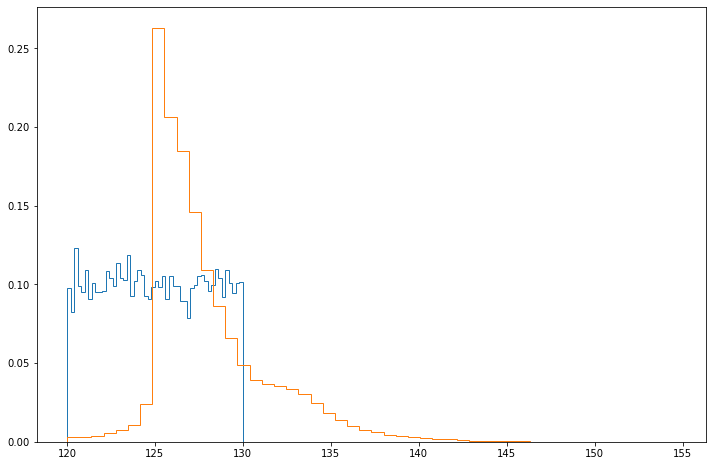

In [30]:
bhbv_cut3, xedges_bcut3, patches_bc3 = plt.hist(bkgd_cut3['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
hhbv_cut3, xedges_hcut3, patches_hc3 = plt.hist(higgs_cut2['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
plt.show() #these plots are only for getting bins

In [31]:
xch_cut3 = (xedges_hcut3[:-1] + xedges_hcut3[1:]) / 2
mu_hc3 = xch_cut3[hhbv_cut3.argmax()]
mu_hc3 #cut 3 mu_higgs

125.19272318824079

In [32]:
xcb_cut3 = (xedges_bcut3[:-1] + xedges_bcut3[1:]) / 2
mu_bc3 = xcb_cut3[bhbv_cut3.argmax()]
mu_bc3 #cut 3 mu_bkgd

120.50399223764111

In [33]:
cdf_cut3 = stats.poisson(mu_bc3).cdf(mu_hc3)
sign_cut3 = 1-cdf_cut3
significance_sigma_cut3 = stats.poisson.isf(1-cdf_cut3, mu_bc3)
print(sign_cut3*100, significance_sigma_cut3)

32.020758504460325 125.0


Cut 3 has a lower significance than cut 2, implying that the right cut is not needed/hampers the data.

3.) Make two sets of stacked histogram plots for the rest of the features
    
Set A without any event selection
    
Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)
    
Set B with your optimal mass cuts
    
Can you identify another feature to further improve your expected signifiance?


In [34]:
# setA
#fig, ax = plt.subplots(1, 1)

#ax.set_xlim(0, 200)

#for idx, val in enumerate(np.array(hhdf.columns)):
    #print(val)
#    plt.hist(hqdf[val], histtype='step', bins=50, density=True, label = f'bkgd {val}')
#    plt.hist(hhdf[val], histtype='step', bins=50, density=True, label = f'higgs {val}')
def nocutplot(col):
    plt.hist(hqdf[col], histtype='step', bins=50, density=True, label = f'bkgd {col}')
    plt.hist(hhdf[col], histtype='step', bins=50, density=True, label = f'higgs {col}')
    plt.title(f'Hi-pT samples - higgs to background, {col} comparison, no cut')
    plt.xlabel('sigma')
    plt.ylabel('density')
    plt.legend()
    plt.show()

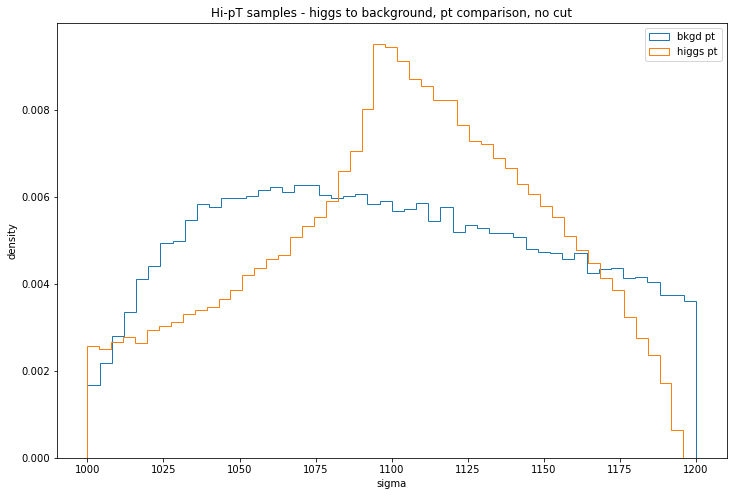

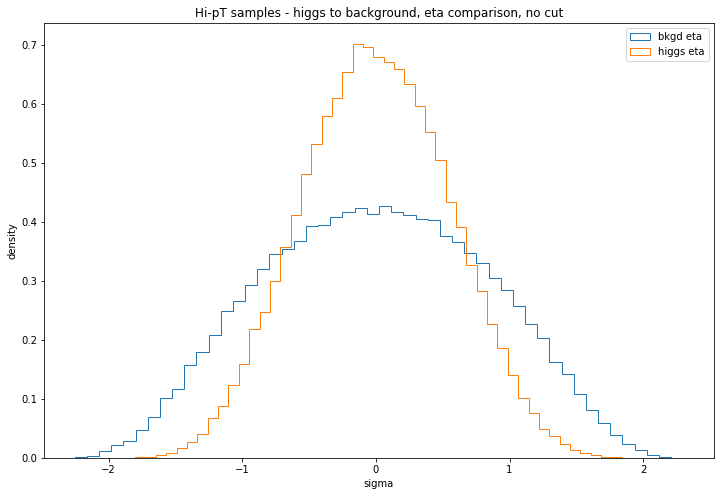

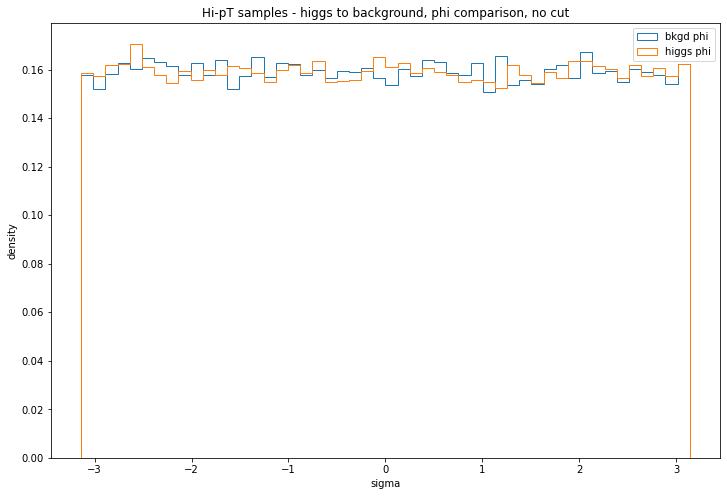

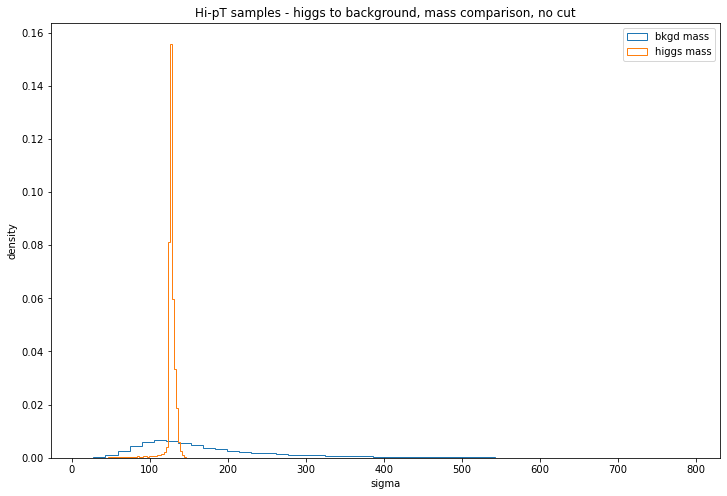

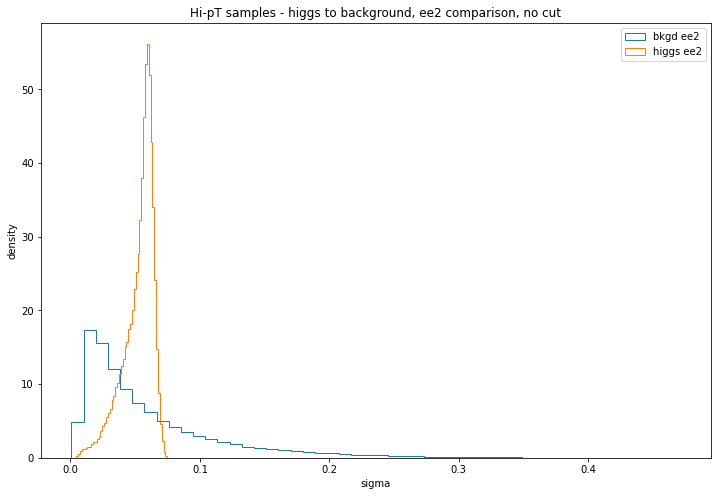

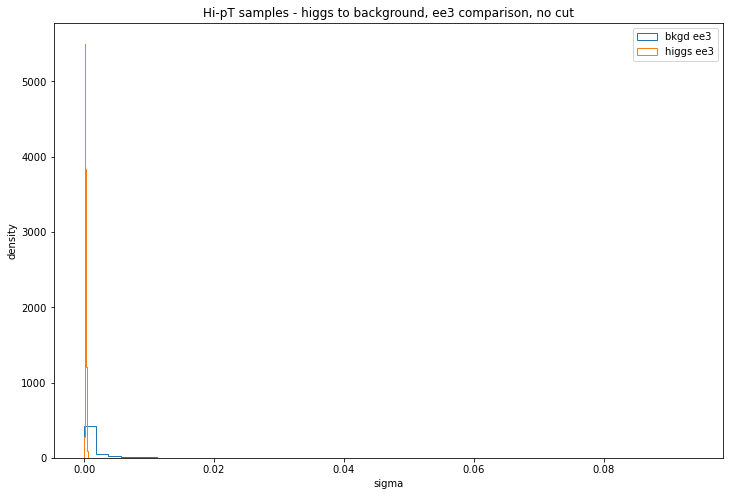

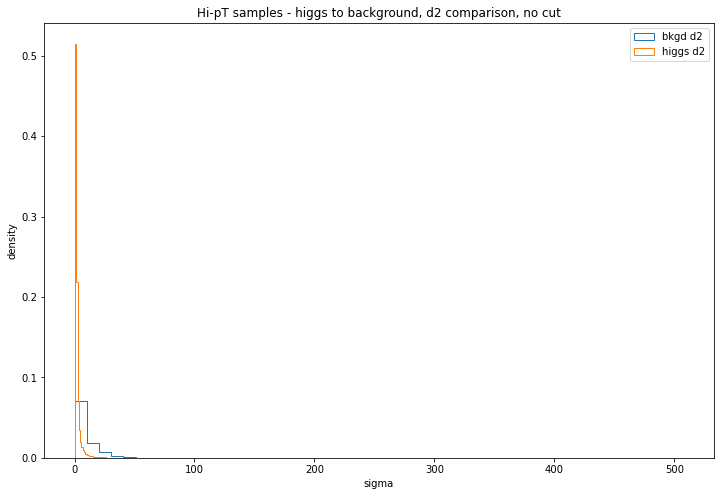

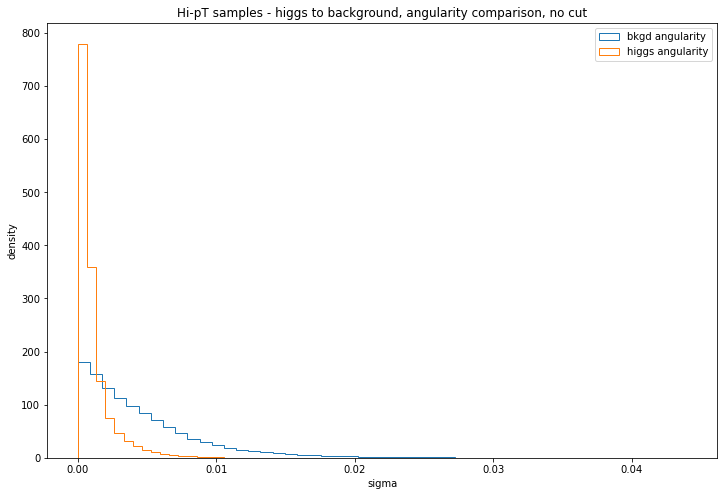

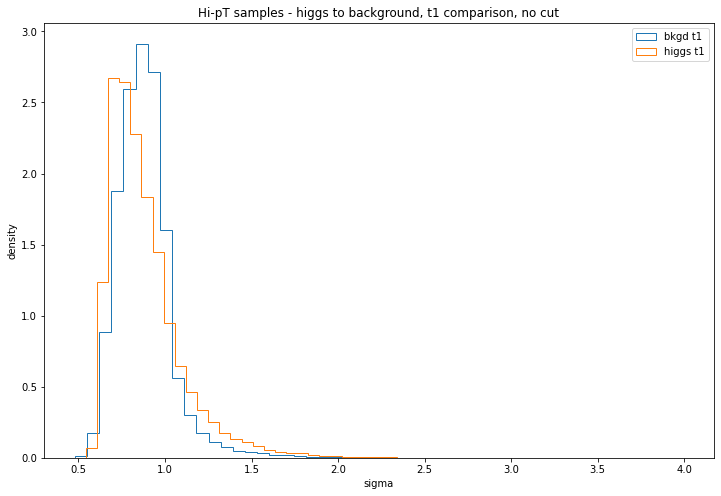

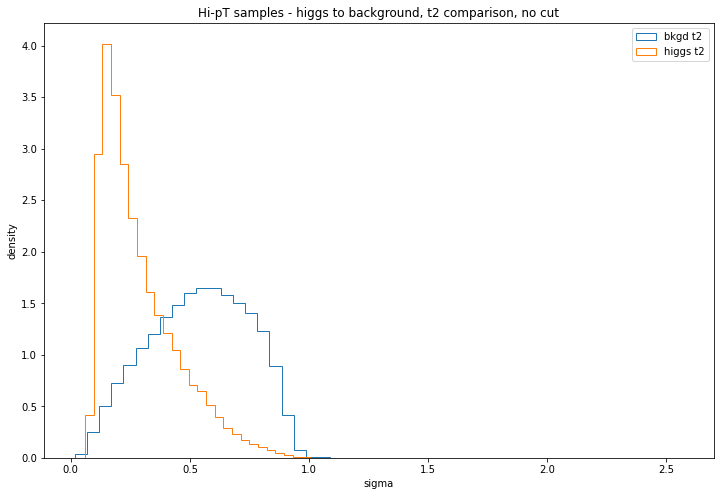

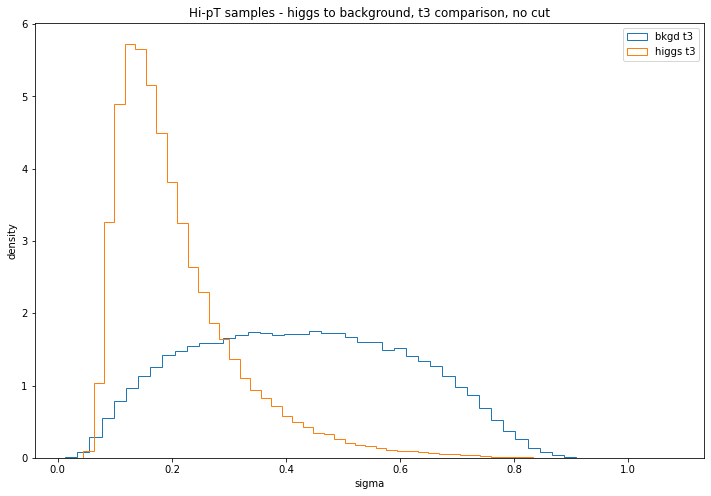

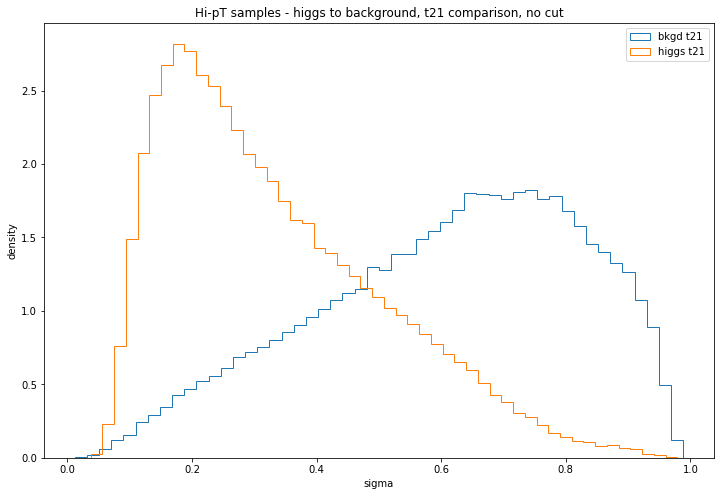

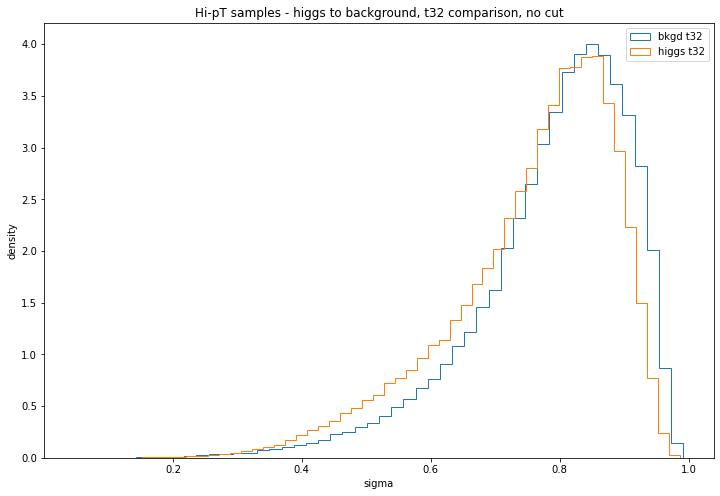

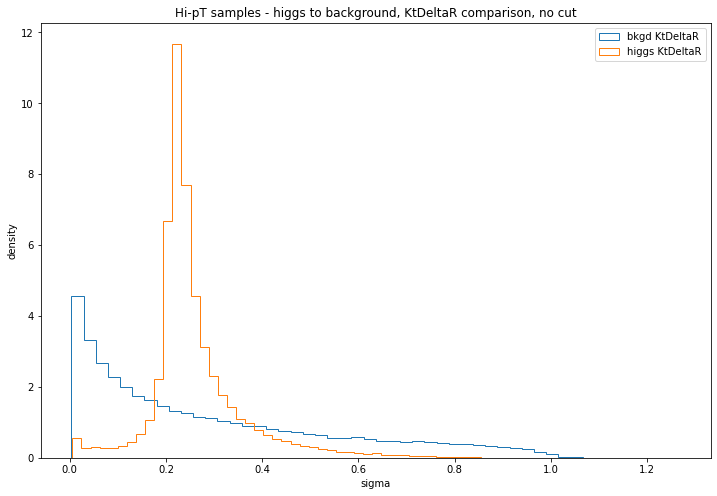

In [35]:
for idx, val in enumerate(np.array(hhdf.columns)):
    nocutplot(val)

In [36]:
def cutplot(col):
    plt.hist(bkgd_cut2[col], histtype='step', bins=50, density=True, label = f'bkgd {col}')
    plt.hist(higgs_cut2[col], histtype='step', bins=50, density=True, label = f'higgs {col}')
    plt.title(f'Hi-pT samples - higgs to background, {col} comparison, mass cut (mass > 120)')
    plt.xlabel('sigma')
    plt.ylabel('density')
    plt.legend()
    plt.show()

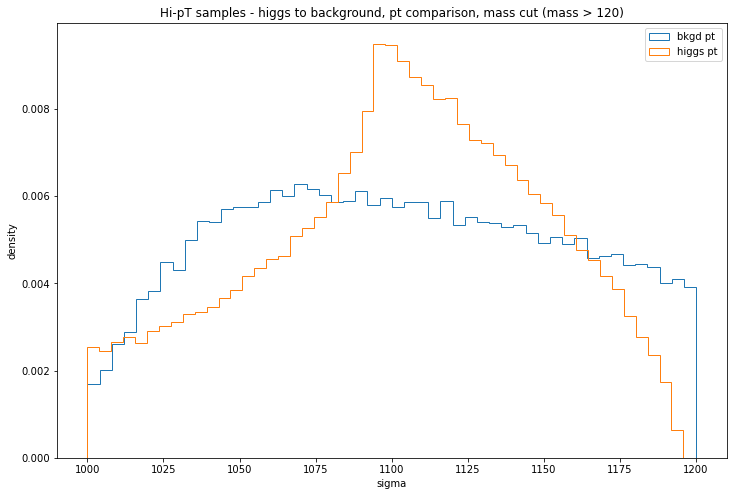

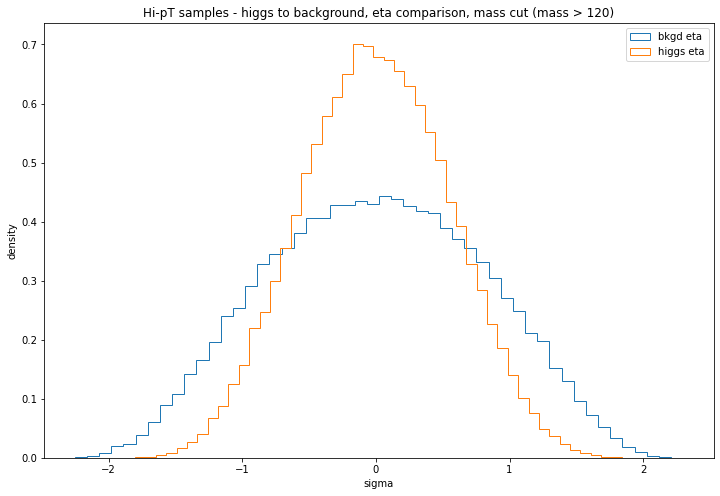

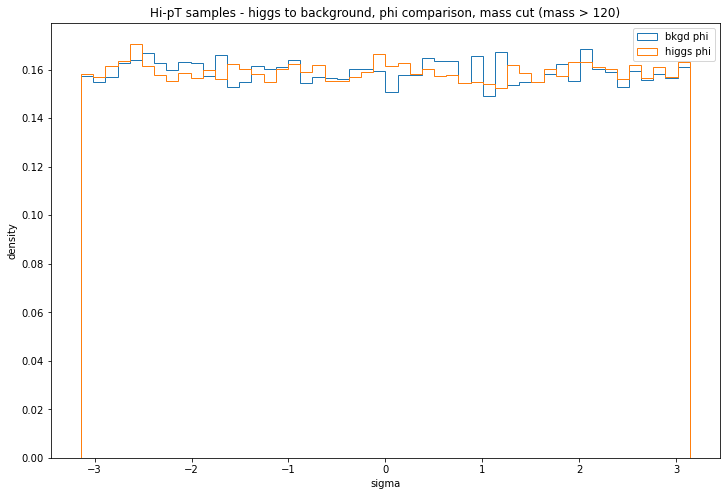

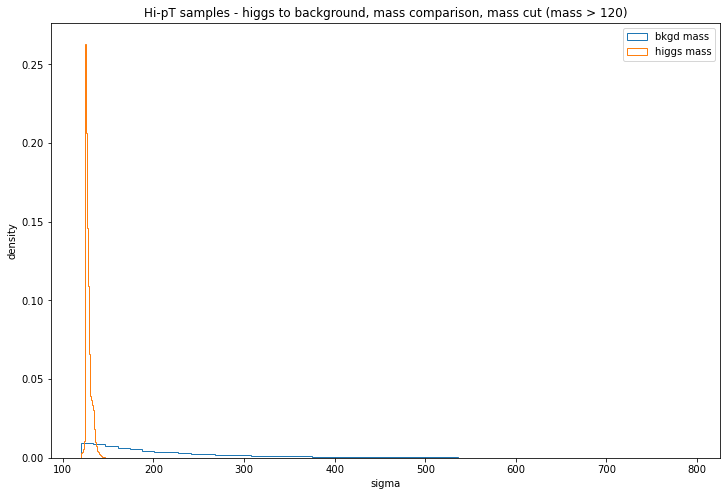

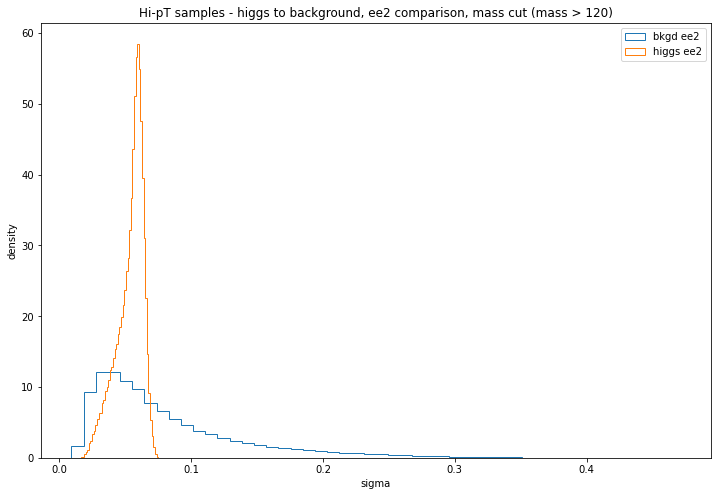

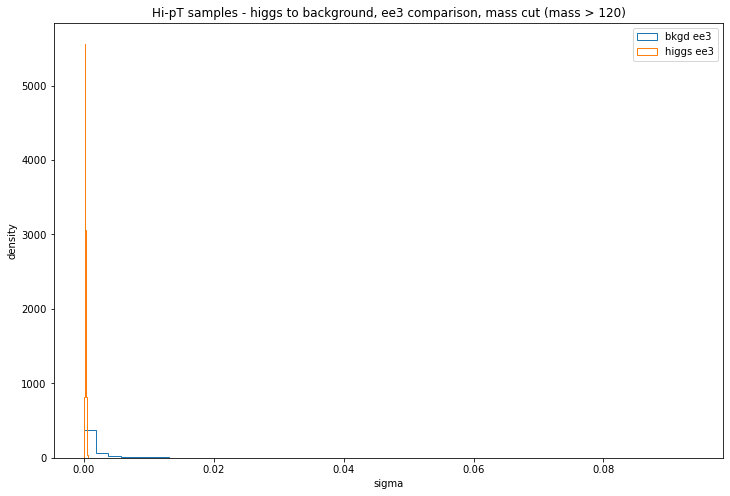

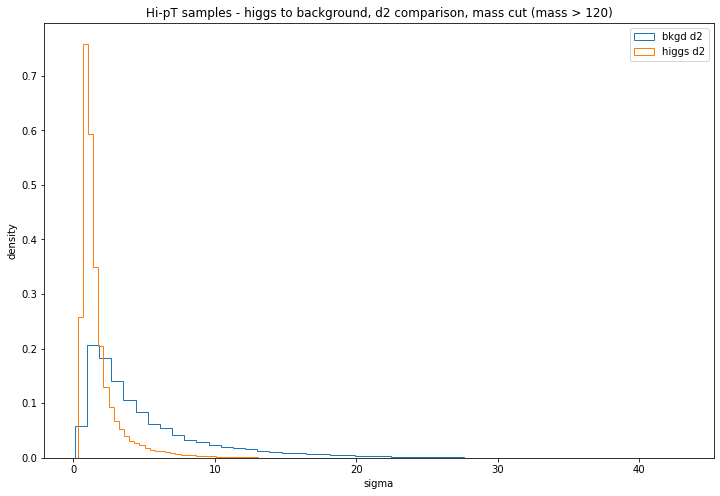

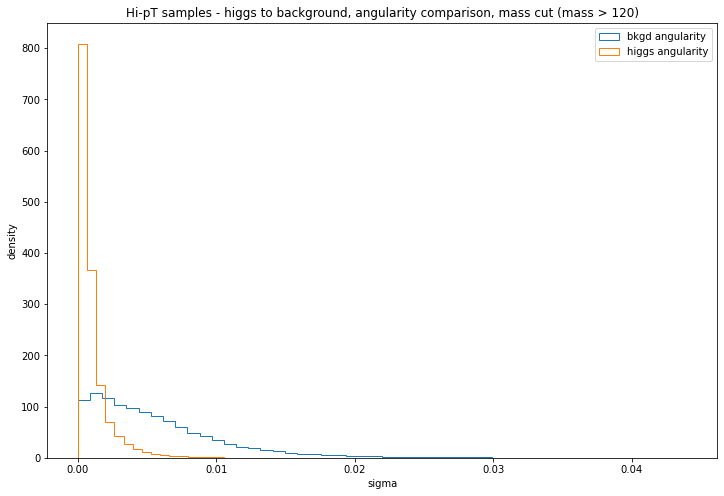

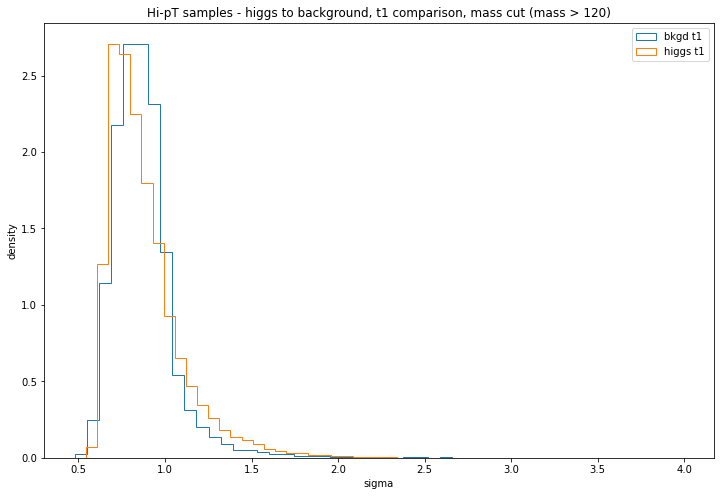

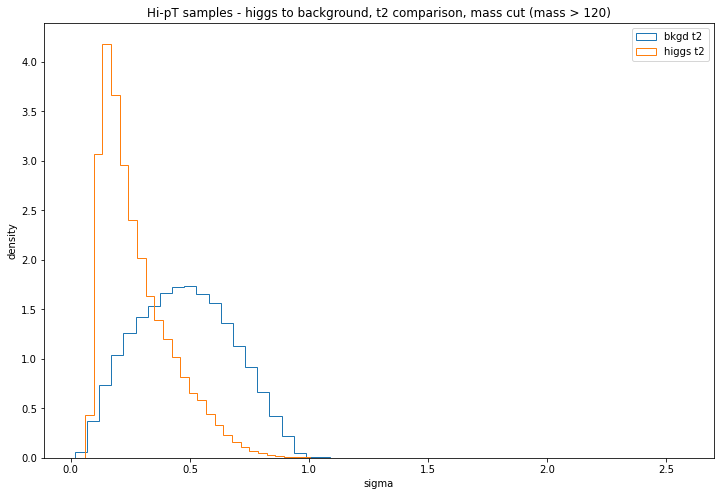

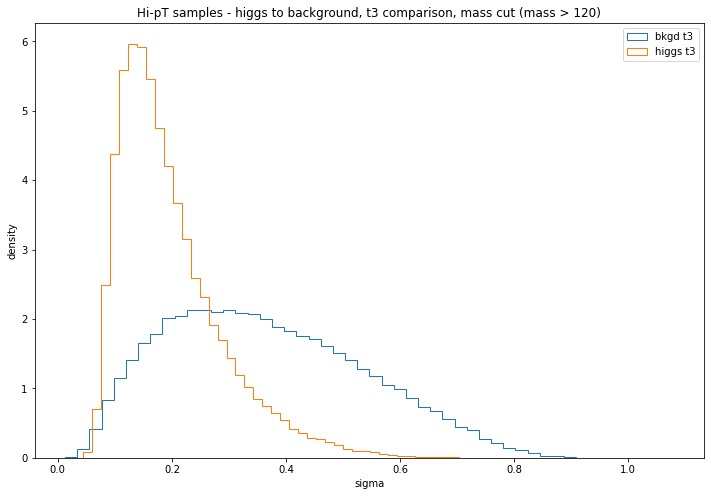

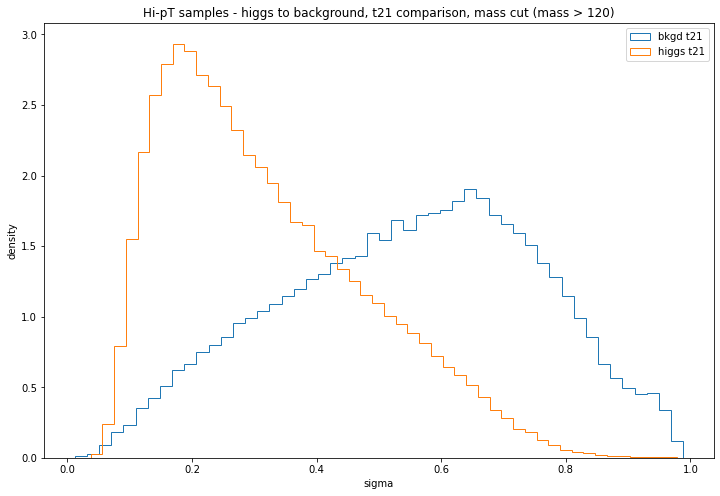

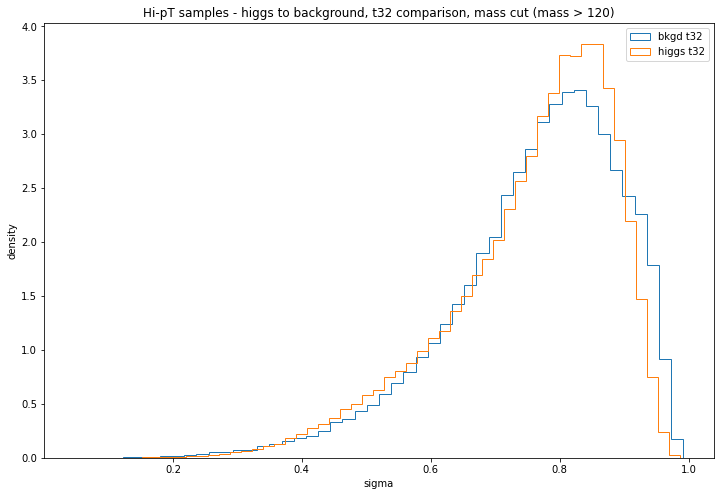

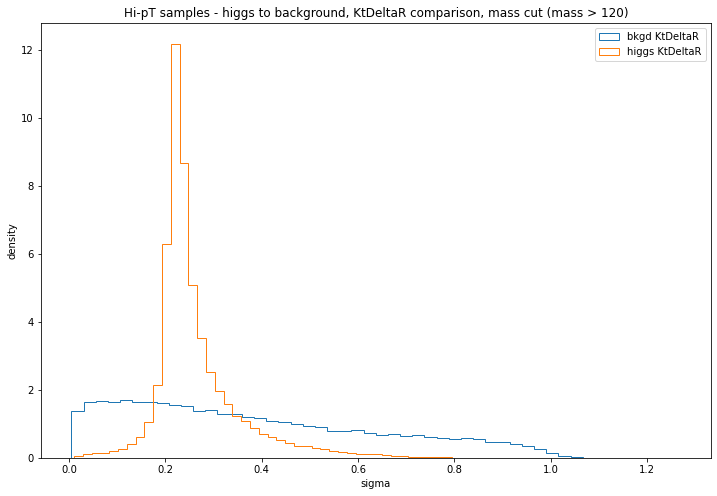

In [37]:
for idx, val in enumerate(np.array(hhdf.columns)):
    cutplot(val)

Another cut that can be done is on feature t21- cutting the data past a certain t21 value such as .8 can further increase our significance of the higgs data by cutting out more background to focus on the higgs signal.

4.) Optimize event selections using multiple features (if necessary)

Find a set of feature cuts which achieve high expected significance.

Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

A set of feature cuts that should achieve high expected significance would be a lower mass cut of 120 and a upper t21 cut of 0.6.

In [38]:
higgs_fc = hhdf.query('mass > 120 & t21 < .6')
bkgd_fc = hqdf.query('mass > 120 & t21 < .6')

In [39]:
higgs_fc

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [40]:
bkgd_fc

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
5,1155.195224,0.003468,-1.625682,298.826804,0.106260,0.003030,2.525106,0.020123,0.717723,0.358535,0.176662,0.499545,0.492732,0.345423
6,1078.106437,-0.972935,2.837172,120.116849,0.047568,0.000325,3.018076,0.001083,1.135965,0.479567,0.354158,0.422167,0.738495,0.125461
9,1011.238531,0.833684,2.923444,246.644020,0.135709,0.003229,1.291779,0.001733,1.162754,0.415601,0.292361,0.357428,0.703466,0.365706
11,1148.368074,1.161407,2.592704,169.543296,0.062803,0.000585,2.360074,0.001960,0.794199,0.223522,0.162839,0.281443,0.728513,0.230350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,1094.396085,-1.560466,-2.647806,144.365655,0.057930,0.000468,2.407151,0.000281,1.170020,0.319112,0.255568,0.272740,0.800874,0.157811
99992,1173.797195,-1.534514,-3.070980,308.910987,0.144472,0.004624,1.533262,0.000476,0.983060,0.402602,0.247070,0.409540,0.613682,0.381438
99993,1076.044752,1.646829,-0.797085,192.138299,0.082790,0.001402,2.470726,0.000341,0.878851,0.436576,0.275616,0.496758,0.631313,0.298472
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015


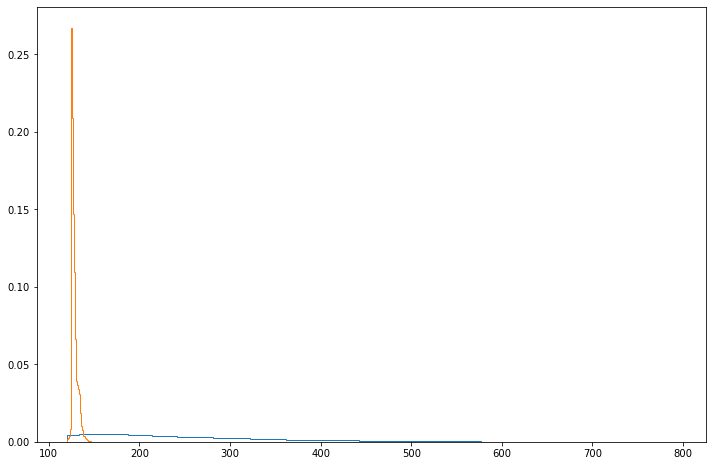

In [41]:
bhbv_f, xedges_bf, patches_bf = plt.hist(bkgd_fc['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
hhbv_f, xedges_hf, patches_hf = plt.hist(higgs_fc['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
plt.show()

In [42]:
xch_f = (xedges_hf[:-1] + xedges_hf[1:]) / 2
mu_hf = xch_f[hhbv_f.argmax()]
mu_hf #final cut mu_higgs

125.1984307865391

In [43]:
xcb_f = (xedges_bf[:-1] + xedges_bf[1:]) / 2
mu_bf = xcb_f[bhbv_f.argmax()]
mu_bf #cut 3 mu_bkgd

153.6071553153393

In [44]:
cdf_f = stats.poisson(mu_bf).cdf(mu_hf)
sign_f = 1-cdf_f
significance_sigma_f = stats.poisson.isf(1-cdf_f, mu_bf)
print(sign_f*100, significance_sigma_f)

99.0069558528886 126.0


This gives us a significance of .99 or 99 percent, which is just about double that of our significance of the last cut. This cut is good because it focuses down the background in order to ensure relatively high signal significance.

Compared to my partner's cuts of the low pT sample, which yielded a significance of 20, this is much greater by a longshot. However, this may be because the low pT Higgs signal is greatly overshadowed by the background in general.

## Lab 8. Pseudo-experiment data analysis 
Using your optimized event selection, hunt for your signal by using the pseudo-experiment datasets.

High luminosity data
- For each feature of your event selection, plot the observed data overlapped with expected signal and background (normalized to observed yields) with/without event selection.
- Evaluate observed significance and compare your results to expectation.

Low luminosity data
- Do as before with the high luminosity data and comment on the difference.

In [45]:
yield_higgs = 50
yield_bkgd = 2000

In [46]:
df_hiLumi = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
df_hiLumi

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1014.701381,0.320861,1.662700,237.429321,0.119700,0.002641,1.539811,0.008410,1.020637,0.284296,0.259425,0.278548,0.912517,0.356557
1,1040.093465,-0.402904,0.657100,137.024953,0.028117,0.000290,13.035447,0.007623,0.924653,0.883464,0.682923,0.955454,0.773007,0.032092
2,1023.915889,-0.157793,1.352514,161.716106,0.046337,0.000674,6.771647,0.009618,0.938172,0.743193,0.663864,0.792171,0.893260,0.178641
3,1079.532839,-1.356773,-0.683310,85.629307,0.011316,0.000039,27.146507,0.000455,1.033940,0.927058,0.855880,0.896626,0.923222,0.010303
4,1167.522933,0.032726,-1.440446,345.520406,0.156304,0.006467,1.693575,0.011564,0.940346,0.555762,0.382950,0.591018,0.689055,0.349341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1090.490389,-0.383384,0.580866,315.865016,0.148747,0.004730,1.437327,0.008757,0.899599,0.220003,0.165191,0.244556,0.750857,0.463219
4062,1024.261156,0.782132,-1.597681,114.142976,0.020067,0.000148,18.339293,0.003206,0.914173,0.848558,0.782821,0.928225,0.922531,0.015276
4063,1018.257604,0.658496,0.893016,55.924149,0.017371,0.000030,5.665910,0.001219,0.752979,0.345601,0.312060,0.458978,0.902950,0.092592
4064,1198.680592,0.307368,-1.514498,107.594697,0.015019,0.000039,11.637634,0.003877,0.605913,0.216714,0.203449,0.357665,0.938791,0.652686


In [47]:
df_loLumi = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')
df_loLumi

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1019.103763,-0.126256,0.971333,606.144181,0.366305,0.045408,0.923857,0.032897,0.853694,0.363566,0.159485,0.425874,0.438667,0.927449
1,1097.722115,-1.026775,-1.318647,136.198997,0.046489,0.000372,3.702281,0.000907,0.909950,0.650283,0.490157,0.714635,0.753759,0.100155
2,1109.516013,0.147645,1.301173,269.369966,0.129854,0.002386,1.089623,0.005363,1.247856,0.230705,0.181573,0.184881,0.787038,0.407922
3,1154.910626,0.836038,0.272040,293.627489,0.095157,0.003254,3.776053,0.010163,0.753989,0.462067,0.304606,0.612829,0.659226,0.298514
4,1106.100328,0.150553,2.831497,174.127072,0.070252,0.000545,1.572763,0.005132,0.785784,0.124047,0.099418,0.157864,0.801454,0.277085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,1125.085037,0.133820,1.415696,176.161322,0.085318,0.000918,1.477743,0.002779,1.082724,0.487478,0.376681,0.450233,0.772714,0.262421
438,1142.878511,-0.563646,-1.692034,242.973633,0.088217,0.001946,2.833835,0.009067,0.829291,0.469421,0.314822,0.566051,0.670660,0.256362
439,1146.873619,-0.641382,-0.941524,216.690343,0.070246,0.001387,4.000989,0.004606,0.830399,0.583299,0.420644,0.702431,0.721147,0.123462
440,1142.946359,-0.424503,-2.159985,96.195083,0.012807,0.000057,27.062195,0.004242,0.923514,0.812622,0.767647,0.879924,0.944654,0.011240


In [48]:
df_hiLumicut = df_hiLumi.query('mass > 120 & t21 < .6')
df_loLumicut = df_loLumi.query('mass > 120 & t21 < .6')

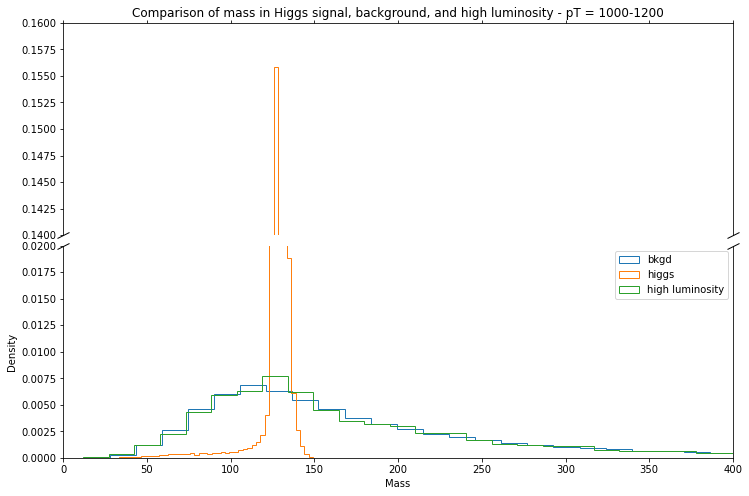

In [49]:
#Without event selection:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

ax1.hist(hqdf['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax1.hist(hhdf['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
ax1.hist(df_hiLumi['mass'], histtype = 'step', bins=50, density=True, label = 'high luminosity')
bkgdbinval, xedges_bkgd, patches_bkgd = ax2.hist(hqdf['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax2.hist(hhdf['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
hlbinval, xedges_hl, patches_bhl = ax2.hist(df_hiLumi['mass'], histtype = 'step', bins=50, density=True, label = 'high luminosity')

ax1.set_xlim(0,400)
ax1.set_ylim(0.14, .16)
ax2.set_ylim(0, 0.02)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_ylabel('Density')
ax2.set_xlabel('Mass')

ax1.set_title('Comparison of mass in Higgs signal, background, and high luminosity - pT = 1000-1200')
plt.legend()
plt.show()

In [50]:
xchl = (xedges_hl[:-1] + xedges_hl[1:]) / 2
mu_hiLumi = xchl[hlbinval.argmax()]
mu_hiLumi #no cut mu_hiLumi

126.36206075865138

In [51]:
xcbkgd = (xedges_bkgd[:-1] + xedges_bkgd[1:]) / 2
mu_bkgd = xcbkgd[bkgdbinval.argmax()]
mu_bkgd #no cut mu_bkgd

113.3806516566886

In [52]:
cdf_hiLumi = stats.poisson(mu_bkgd).cdf(mu_hiLumi)
sign_hiLumi = 1-cdf_hiLumi
significance_sigma_hiLumi = stats.poisson.isf(1-cdf_hiLumi, mu_bkgd)
print(sign_hiLumi*100, significance_sigma_hiLumi)

11.032786607244837 126.0


In [53]:
expected_hiLumi = len(df_hiLumi)/np.sqrt(len(hqdf))
expected_hiLumi

12.85782096624463

The observed significance of the high luminosity data is fairly close to the expected significance value, with a difference of about 1.8 percent.

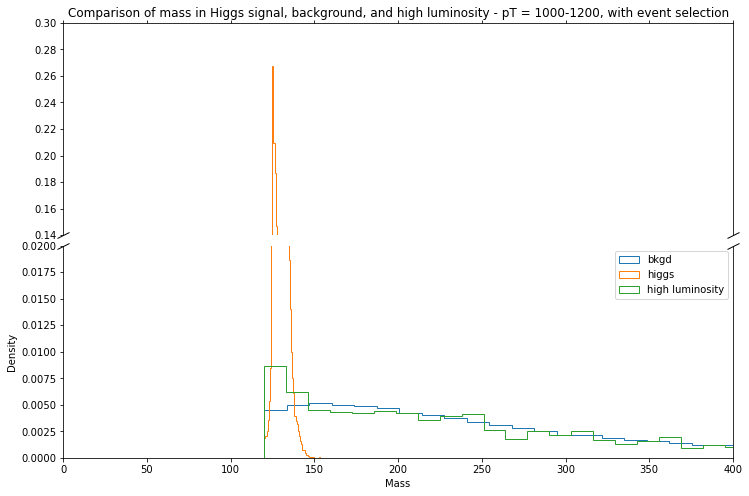

In [54]:
#With event selection
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

ax1.hist(bkgd_fc['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax1.hist(higgs_fc['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
ax1.hist(df_hiLumicut['mass'], histtype = 'step', bins=50, density=True, label = 'high luminosity')
ax2.hist(bkgd_fc['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax2.hist(higgs_fc['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
hlbinvalcut, xedges_hlcut, patches_bhlcut = ax2.hist(df_hiLumicut['mass'], histtype = 'step', bins=50, density=True, label = 'high luminosity')

ax1.set_xlim(0,400)
ax1.set_ylim(0.14, .3)
ax2.set_ylim(0, 0.02)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_ylabel('Density')
ax2.set_xlabel('Mass')

ax1.set_title('Comparison of mass in Higgs signal, background, and high luminosity - pT = 1000-1200, with event selection')
plt.legend()
plt.show()

In [55]:
xchlcut = (xedges_hlcut[:-1] + xedges_hlcut[1:]) / 2
mu_hiLumicut = xchlcut[hlbinvalcut.argmax()]
mu_hiLumicut #cut mu_hiLumi

126.70086684722088

In [56]:
cdf_hlcut = stats.poisson(mu_bf).cdf(mu_hiLumicut)
sign_hlcut = 1-cdf_hlcut
significance_sigma_hlcut = stats.poisson.isf(1-cdf_hlcut, mu_bf)
print(sign_hlcut*100, significance_sigma_hlcut)

98.75463339089183 126.0


In [57]:
expected_hiLumicut = len(df_hiLumicut)*(1/len(df_hiLumi))/np.sqrt(len(bkgd_fc)*1/len(hqdf))
expected_hiLumicut

0.6410599560842538

The observed significance is much greater than the expected significance after the cut, by about 30 percent. This could mean that perhaps the expected significance can vary greatly between the observed significance.

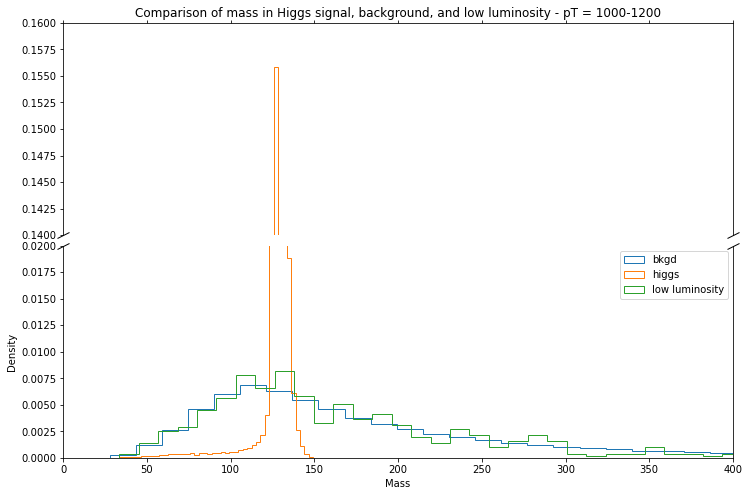

In [61]:
#Without event selection, low luminosity:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

ax1.hist(hqdf['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax1.hist(hhdf['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
ax1.hist(df_loLumi['mass'], histtype = 'step', bins=50, density=True, label = 'low luminosity')
ax2.hist(hqdf['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax2.hist(hhdf['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
llbinval, xedges_ll, patches_bll = ax2.hist(df_loLumi['mass'], histtype = 'step', bins=50, density=True, label = 'low luminosity')

ax1.set_xlim(0,400)
ax1.set_ylim(0.14, .16)
ax2.set_ylim(0, 0.02)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_ylabel('Density')
ax2.set_xlabel('Mass')

ax1.set_title('Comparison of mass in Higgs signal, background, and low luminosity - pT = 1000-1200')
plt.legend()
plt.show()

In [62]:
xcll = (xedges_ll[:-1] + xedges_ll[1:]) / 2
mu_loLumi = xcll[llbinval.argmax()]
mu_loLumi #no cut mu_hiLumi

132.1624697040009

In [64]:
cdf_ll = stats.poisson(mu_bkgd).cdf(mu_loLumi)
sign_ll = 1-cdf_ll
significance_sigma_ll = stats.poisson.isf(1-cdf_ll, mu_bkgd)
print(sign_ll*100, significance_sigma_ll)

3.8898576435024257 132.0


In [65]:
expected_ll = len(df_loLumi)/np.sqrt(len(hqdf))
expected_ll

1.3977267257944235

Much like the high luminosity, the observed and expected significances are within a few percent of each other, however, the low luminosity data has a comparably low significance compared to the high luminosity data.

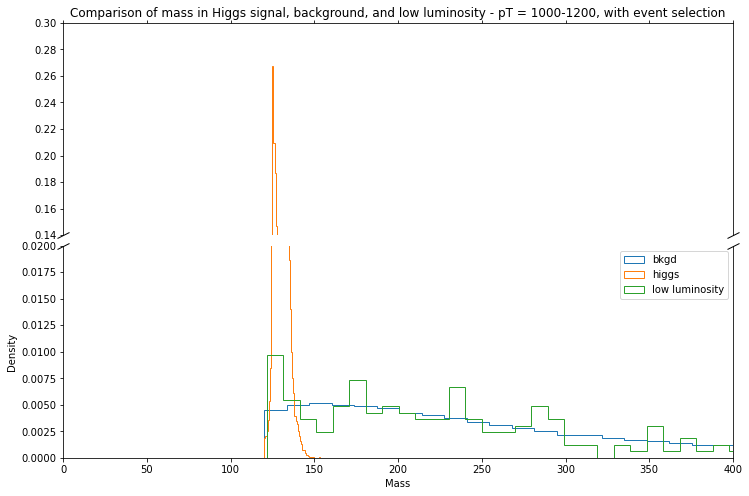

In [66]:
#With event selection
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

ax1.hist(bkgd_fc['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax1.hist(higgs_fc['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
ax1.hist(df_loLumicut['mass'], histtype = 'step', bins=50, density=True, label = 'low luminosity')
ax2.hist(bkgd_fc['mass'], histtype='step', bins=50, density=True, label = 'bkgd')
ax2.hist(higgs_fc['mass'], histtype = 'step', bins=50, density=True, label = 'higgs')
llbinvalcut, xedges_llcut, patches_bllcut = ax2.hist(df_loLumicut['mass'], histtype = 'step', bins=50, density=True, label = 'low luminosity')

ax1.set_xlim(0,400)
ax1.set_ylim(0.14, .3)
ax2.set_ylim(0, 0.02)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_ylabel('Density')
ax2.set_xlabel('Mass')

ax1.set_title('Comparison of mass in Higgs signal, background, and low luminosity - pT = 1000-1200, with event selection')
plt.legend()
plt.show()

In [67]:
xcllcut = (xedges_llcut[:-1] + xedges_llcut[1:]) / 2
mu_loLumicut = xcllcut[llbinvalcut.argmax()]
mu_loLumicut #cut mu_loLumi

126.57438781214572

In [68]:
cdf_llcut = stats.poisson(mu_bf).cdf(mu_loLumicut)
sign_llcut = 1-cdf_llcut
significance_sigma_llcut = stats.poisson.isf(1-cdf_llcut, mu_bf)
print(sign_llcut*100, significance_sigma_llcut)

98.75463339089183 126.0


In [69]:
expected_loLumicut = len(df_loLumicut)*(1/len(df_loLumi))/np.sqrt(len(bkgd_fc)*1/len(hqdf))
expected_loLumicut

0.614748834178208

Comparitively, with the cut, the low luminosity also has a observed significance of 98 percent, and a expected significance of 61 percent, like the high luminosity cut.

### 95% Confidence Level of signal yields

In the low luminosity data, the observed significance is less than 5 σ . We will calculate the 95% confidence level upper limit of signal yield.
- Evaluate the expected 95% confidence level upper limit
- Evaluate the observed 95% confidence level upper limit
- Compare expectation to observation. Comment on your finding.

In [80]:
#observed 95 percent confidence level
#confidence coeff (z) = 1.96, standard deviation (s) = significance
#CI = mu +- z(s/sqrt(n))
z = 1.96
s = sign_ll#np.std(df_loLumi['mass'])
CI_upper_obs = mu_loLumi + z*(s/np.sqrt(len(df_loLumi)))
CI_upper_obs

132.16609612853725

In [82]:
#expected 95 percent confidence level
s2 = expected_ll
CI_upper_exp = mu_loLumi + z*(s2/np.sqrt(len(df_loLumi)))
CI_upper_exp

132.2927765418875

Comparing the expected confidence to the observed confidence, they are both very close together - which is to be expected, as for low luminosity without cuts, the expected and observed significance is close by. The resulting upper limit is also reasonable, as the sigma for the mean of the low luminosity data projected onto the background is at 126, which is close to 132.